Here, we explore unsupervised learning algorithms, namely k-means and principal component analysis (PCA). K-means is a popular algorithm for clustering, whereas PCA is commonly used for dimensionality reduction.

# 0.0 Import Modules

Here we use numpy and pandas for data processing. We use the Scikit-learn implementations of PCA and k-means. We use matplotlib and seaborn for plotting.

In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fnt
import seaborn as sns

# 0.1 Plot Settings

In [10]:
matplotlib.use('TkAgg')
%matplotlib inline 
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12

# Generate some sequential colormaps
green = sns.color_palette("YlGn_r", 7)
red_purple = sns.color_palette("RdPu_r", 7)
blue = sns.color_palette("Blues_r", 7)
or_red = sns.color_palette("YlOrRd_r", 7)

# 0.2 Load Data

Here we're loading data from the jet-in-hot-coflow (JHC) configuration by Douasbin et. al. (2021) (https://www.sciencedirect.com/science/article/pii/S0010218020304156)

In [11]:
data = pd.read_csv("./data/jhc.solut.csv")

And we visualize some flowfields from the data.

Text(0.5, 1.0, '$Y_{CO2}$ [-]')

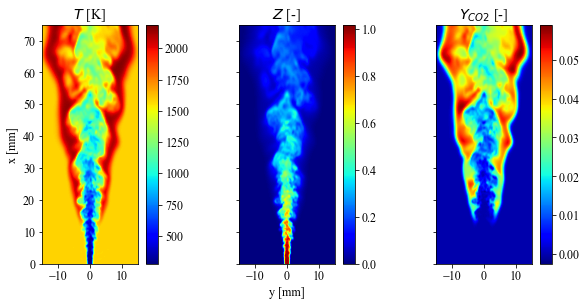

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4.4), sharey=True)
temp_plot = axs[0].imshow(np.array(data['T']).reshape(200,500).T, 
              extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000],
              interpolation='bicubic', cmap='jet',origin='lower')
fig.colorbar(temp_plot, ax=axs[0])
axs[0].set_title(r'$T$ [K]')
axs[0].set_ylabel('x [mm]')
axs[1].set_xlabel('y [mm]')
z_plot = axs[1].imshow(np.array(data['ZBilger']).reshape(200,500).T, 
              extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000],
              interpolation='bicubic', cmap='jet',origin='lower')

fig.colorbar(z_plot, ax=axs[1])
axs[1].set_title(r'$Z$ [-]')

co2_plot= axs[2].imshow(np.array(data['Y_CO2']).reshape(200,500).T, 
              extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000],
              interpolation='bicubic', cmap='jet',origin='lower')
fig.colorbar(co2_plot, ax=axs[2])
axs[2].set_title(r'$Y_{CO2}$ [-]')


Then we normalize the raw data as a pre-processing step. This is generally good practice when applying data-driven methods.

In [12]:
X = data[['ZBilger', 'Y_CH4', 'Y_CO2' \
, 'Y_CO', 'Y_O2', 'Y_H2O', 'T']].copy()
X_scaled = StandardScaler().fit_transform(X.values)

# 1.0 K-means Clustering

Next, we initialize the k-means clustering algorithm for several cluster sizes.

In [22]:
km2 = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km3 = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km4 = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km5 = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km6 = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

Then, we apply k-means on the normalized dataset.

In [23]:
y_km2 = km2.fit_predict(X_scaled)
y_km3 = km3.fit_predict(X_scaled)
y_km4 = km4.fit_predict(X_scaled)
y_km5 = km5.fit_predict(X_scaled)
y_km6 = km6.fit_predict(X_scaled)

And we visualize the results.

Text(0.5, 0, 'y [mm]')

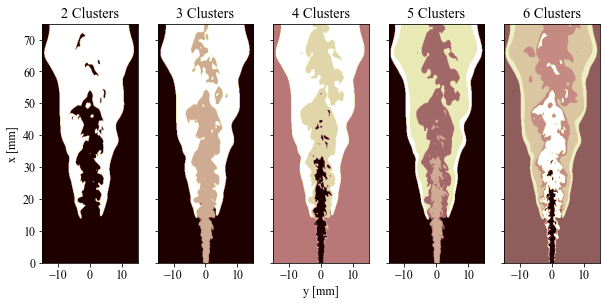

In [7]:
fig, axs = plt.subplots(1, 5, figsize=(10, 4.4), sharey=True)

axs[0].imshow(y_km2.reshape(200,500).T,origin='lower',cmap='pink',
             extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[0].set_title('2 Clusters')
axs[1].imshow(y_km3.reshape(200,500).T,origin='lower',cmap='pink',
              extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[1].set_title('3 Clusters')
axs[2].imshow(y_km4.reshape(200,500).T,origin='lower',cmap='pink',
              extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[2].set_title('4 Clusters')
axs[3].imshow(y_km5.reshape(200,500).T,origin='lower',cmap='pink',
              extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[3].set_title('5 Clusters')
axs[4].imshow(y_km6.reshape(200,500).T,origin='lower',cmap='pink',
              extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[4].set_title('6 Clusters')
axs[0].set_ylabel('x [mm]')
axs[2].set_xlabel('y [mm]')


K-means is able to detect several interesting flow features. Such as the reaction zone (after 5  clusters) and the non-reacting region (after 3 clusters)

# 1.1 PCA

Next we examine PCA. First, we initialize and then we apply PCA for to reduce the data to 2 components. This makes visualization on a 2D plot simple.

In [13]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

Then we plot the PCA weights. This is done through the pca.components_ attribute.

Text(0, 0.5, '\\textrm{PCA Weights}')

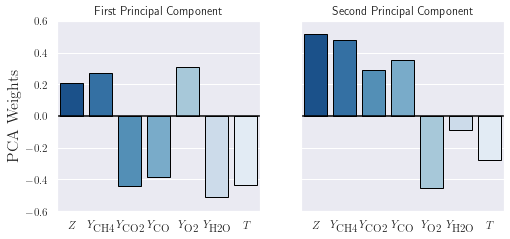

In [18]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman"})
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)

# Generate some sequential data
green = sns.color_palette("YlGn_r", 7)
red_purple = sns.color_palette("RdPu_r", 7)
blue = sns.color_palette("Blues_r", 7)
or_red = sns.color_palette("YlOrRd_r", 7)

sns.set(style="darkgrid")

fig1 = sns.barplot(y = pca.components_[0] , x = [r'$Z$',r'$Y_{\textrm{CH4}}$',r'$Y_{\textrm{CO2}}$'\
                                          ,r'$Y_{\textrm{CO}}$',r'$Y_{\textrm{O2}}$',r'$Y_{\textrm{H2O}}$',r'$T$'],\
                   palette = blue, ax=axs[0],edgecolor='black')
axs[0].axhline(0, color='black')
axs[0].set_title('First Principal Component')
fig2 = sns.barplot(y = pca.components_[1] , x = [r'$Z$',r'$Y_{\textrm{CH4}}$',r'$Y_{\textrm{CO2}}$'\
                                          ,r'$Y_{\textrm{CO}}$',r'$Y_{\textrm{O2}}$',r'$Y_{\textrm{H2O}}$',r'$T$'],\
                   palette = blue, ax=axs[1],edgecolor='black')
axs[1].axhline(0, color='black')
axs[0].set_ylim([-0.6, 0.6]) 
axs[1].set_title('Second Principal Component')
axs[0].set_ylabel("\\textrm{PCA Weights}", fontsize=16)


The first principal component is heavily weighted in the negative direction with combustion products and temperature. The intermediate and complete combustion products correspond with clusters where the first principal component is negative. The second principal component is heavily weighted in the positive direction with mixture fraction and CH$_4$, and in the negative direction with O$_2$ and temperature.

Next, we demontrate how dimensionality reduction via PCA can be used for easier visualization.

First, we apply kmeans on the reduced data

In [24]:
y_pca_km2 = km2.fit_predict(principalComponents)
y_pca_km3 = km3.fit_predict(principalComponents)
y_pca_km4 = km4.fit_predict(principalComponents)
y_pca_km5 = km5.fit_predict(principalComponents)
y_pca_km6 = km6.fit_predict(principalComponents)

Then we plot the data in the reduced dimension space.

Text(0, 0.5, '\\textrm{Second Principal Component}')

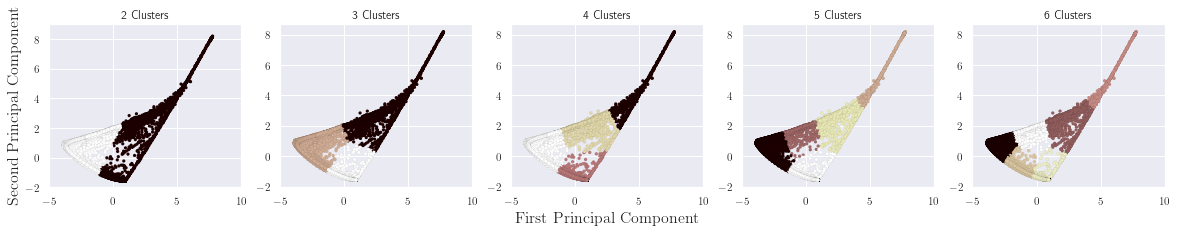

In [25]:
f, axs = plt.subplots(1, 5, figsize=(20, 3), sharex=True)

axs[0].scatter(principalDf.pc1.values[::5],principalDf.pc2.values[::5],c=y_pca_km2[::5],
                s = 10 , cmap = 'pink',edgecolor='black', linewidth = 0.03)
axs[0].set_title('2 Clusters')
axs[1].scatter(principalDf.pc1.values[::5],principalDf.pc2.values[::5],c=y_pca_km3[::5],
                s = 10 , cmap = 'pink',edgecolor='black', linewidth = 0.03)
axs[1].set_title('3 Clusters')
axs[2].scatter(principalDf.pc1.values[::5],principalDf.pc2.values[::5],c=y_pca_km4[::5],
                s = 10 , cmap = 'pink',edgecolor='black', linewidth = 0.03)
axs[2].set_title('4 Clusters')
axs[3].scatter(principalDf.pc1.values[::5],principalDf.pc2.values[::5],c=y_pca_km5[::5],
                s = 10 , cmap = 'pink',edgecolor='black', linewidth = 0.03)
axs[3].set_title('5 Clusters')
axs[4].scatter(principalDf.pc1.values[::5],principalDf.pc2.values[::5],c=y_pca_km6[::5],
                s = 10 , cmap = 'pink',edgecolor='black', linewidth = 0.03)
axs[4].set_title('6 Clusters')



axs[0].set_ylim([-2, 9]) 
axs[0].set_xlim([-5, 10]) 
axs[2].set_xlabel("\\textrm{First Principal Component}", fontsize=16)
axs[0].set_ylabel("\\textrm{Second Principal Component}", fontsize=16)

And we plot the corresponding clusters in physical space.

Text(0.5, 0, 'y [mm]')

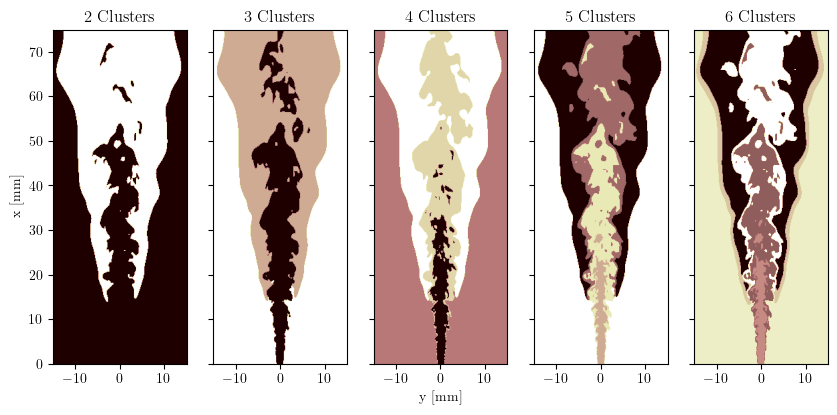

In [27]:
matplotlib.style.use('default') 
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman"})

fig, axs = plt.subplots(1, 5, figsize=(10, 4.4), sharey=True)

axs[0].imshow(y_pca_km2.reshape(200,500).T,origin='lower',cmap='pink',
             extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[0].set_title('2 Clusters')
axs[1].imshow(y_pca_km3.reshape(200,500).T,origin='lower',cmap='pink',
              extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[1].set_title('3 Clusters')
axs[2].imshow(y_pca_km4.reshape(200,500).T,origin='lower',cmap='pink',
              extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[2].set_title('4 Clusters')
axs[3].imshow(y_pca_km5.reshape(200,500).T,origin='lower',cmap='pink',
              extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[3].set_title('5 Clusters')
axs[4].imshow(y_pca_km6.reshape(200,500).T,origin='lower',cmap='pink',
              extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[4].set_title('6 Clusters')
axs[0].set_ylabel('x [mm]')
axs[2].set_xlabel('y [mm]')



Here we can see that regions that share similar physical and chemical properties are plotted close together in the reduced dimension space. 